In [2]:
from process_bank_churn import preprocess_data, preprocess_new_data
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import numpy as np

В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



https://github.com/Nazarht/python-for-ds/blob/34cae7b0d8e71a4b5c03465fc2a99027ea8c13ea/process_bank_churn.py

In [3]:
raw_df = pd.read_csv('./train.csv')

display(raw_df)

X_train, train_targets, X_val, val_targets, input_cols, scaler, encoder = preprocess_data(raw_df, scale_numeric=False)

display(X_train)


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,15807989.0,Ch'iu,585.0,France,Male,33.0,3.0,0.00,1.0,1.0,0.0,54191.38,0.0
14996,14996,15731781.0,Ch'ang,678.0,France,Male,34.0,6.0,0.00,2.0,1.0,1.0,53437.10,0.0
14997,14997,15667093.0,Goliwe,678.0,France,Female,54.0,4.0,0.00,1.0,1.0,0.0,147720.29,1.0
14998,14998,15732644.0,Fanucci,705.0,Spain,Female,40.0,7.0,0.00,2.0,1.0,0.0,149550.95,0.0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,682.0,30.0,1.0,131394.56,1.0,1.0,1.0,143952.24,1.0,0.0,0.0,0.0,1.0
1,684.0,39.0,2.0,178058.06,1.0,1.0,0.0,145518.31,1.0,0.0,0.0,1.0,0.0
2,705.0,35.0,6.0,116320.68,2.0,1.0,0.0,174431.01,0.0,1.0,0.0,0.0,1.0
3,669.0,58.0,0.0,0.00,2.0,0.0,1.0,51565.98,0.0,0.0,1.0,0.0,1.0
4,707.0,21.0,3.0,0.00,2.0,1.0,1.0,148564.76,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,633.0,33.0,4.0,0.00,2.0,0.0,0.0,123537.05,1.0,0.0,0.0,1.0,0.0
11996,673.0,40.0,1.0,0.00,1.0,1.0,1.0,47832.82,1.0,0.0,0.0,1.0,0.0
11997,621.0,29.0,8.0,0.00,2.0,1.0,1.0,133535.29,1.0,0.0,0.0,0.0,1.0
11998,590.0,42.0,7.0,0.00,2.0,0.0,0.0,72643.95,0.0,0.0,1.0,0.0,1.0


**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [4]:
print("         Testing Model 1")
tree_model_1 = DecisionTreeClassifier(random_state=42)

tree_model_1.fit(X_train, train_targets)

train_preds_proba_1 = tree_model_1.predict_proba(X_train)
val_preds_proba_1 = tree_model_1.predict_proba(X_val)

print("Train accuracy (Model 1):", accuracy_score(train_targets, train_preds_proba_1[:, 1]))
print("Validation accuracy (Model 1):", accuracy_score(val_targets, val_preds_proba_1[:, 1]))

print("AUROC Train (Model 1):", roc_auc_score(train_targets, train_preds_proba_1[:, 1]))
print("AUROC Validation (Model 1):", roc_auc_score(val_targets, val_preds_proba_1[:, 1]))

print("Tree Depth (Model 1):", tree_model_1.get_depth())

print("         Testing Model 2")
tree_model_2 = DecisionTreeClassifier(random_state=42, max_depth=2)

tree_model_2.fit(X_train, train_targets)

train_preds_proba_2 = tree_model_2.predict_proba(X_train)
val_preds_proba_2 = tree_model_2.predict_proba(X_val)

train_preds_2 = tree_model_2.predict(X_train)
val_preds_2 = tree_model_2.predict(X_val)

print("Train accuracy (Model 2):", accuracy_score(train_targets, train_preds_2))
print("Validation accuracy (Model 2):", accuracy_score(val_targets, val_preds_2))

print("AUROC Train (Model 2):", roc_auc_score(train_targets, train_preds_proba_2[:, 1]))
print("AUROC Validation (Model 2):", roc_auc_score(val_targets, val_preds_proba_2[:, 1]))

print("Tree Depth (Model 2):", tree_model_2.get_depth())


         Testing Model 1
Train accuracy (Model 1): 1.0
Validation accuracy (Model 1): 0.8396666666666667
AUROC Train (Model 1): 1.0
AUROC Validation (Model 1): 0.7699533575691063
Tree Depth (Model 1): 26
         Testing Model 2
Train accuracy (Model 2): 0.86575
Validation accuracy (Model 2): 0.861
AUROC Train (Model 2): 0.8429075368811715
AUROC Validation (Model 2): 0.8464963303381576
Tree Depth (Model 2): 2


In [5]:
importnace_df = pd.DataFrame({"Feature": X_train.columns ,"Importnace":tree_model_1.feature_importances_})

importnace_df.sort_values(axis=0 ,by="Importnace", ascending=False)[0:9]

,Feature,Importnace
1,Age,0.356789
4,NumOfProducts,0.168379
7,EstimatedSalary,0.123635
0,CreditScore,0.123283
3,Balance,0.079192
2,Tenure,0.052899
6,IsActiveMember,0.032688
11,Gender_Female,0.014908
9,Geography_Germany,0.014725


In [6]:
importnace_df = pd.DataFrame({"Feature": X_train.columns ,"Importnace":tree_model_2.feature_importances_})

importnace_df.sort_values(axis=0 ,by="Importnace", ascending=False)[0:9]

,Feature,Importnace
1,Age,0.714962
4,NumOfProducts,0.285038
0,CreditScore,0.000000
2,Tenure,0.000000
3,Balance,0.000000
5,HasCrCard,0.000000
6,IsActiveMember,0.000000
7,EstimatedSalary,0.000000
8,Geography_France,0.000000


**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [7]:
tree_model_3 = DecisionTreeClassifier(random_state=42, max_depth=5, max_leaf_nodes=27)

tree_model_3.fit(X_train, train_targets)

train_preds_proba_3 = tree_model_3.predict_proba(X_train)
val_preds_proba_3 = tree_model_3.predict_proba(X_val)

train_preds_3 = tree_model_3.predict(X_train)
val_preds_3 = tree_model_3.predict(X_val)

print("Train accuracy (Model 3):", accuracy_score(train_targets, train_preds_3))
print("Validation accuracy (Model 3):", accuracy_score(val_targets, val_preds_3))

print("AUROC Trian (Model 3):", roc_auc_score(train_targets, train_preds_proba_3[:, 1]))
print("AUROC Validation (Model 3):", roc_auc_score(val_targets, val_preds_proba_3[:, 1]))

Train accuracy (Model 3): 0.89525
Validation accuracy (Model 3): 0.8873333333333333
AUROC Trian (Model 3): 0.9256201930401554
AUROC Validation (Model 3): 0.9220406063516017


**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [8]:
def train_tree(md):
    tree_model = DecisionTreeClassifier(random_state=42, max_depth=md)
    
    tree_model.fit(X_train, train_targets)
    
    train_preds_proba_3 = tree_model.predict_proba(X_train)
    val_preds_proba_3 = tree_model.predict_proba(X_val)
    
    return {
        "Max Depth": md,
        "Train AUROC": roc_auc_score(train_targets, train_preds_proba_3[:, 1]),
        "Validation AUROC": roc_auc_score(val_targets, val_preds_proba_3[:, 1])
    }
    
df_arr = []

for i in range(1,21):
    results = train_tree(i)
    df_arr.append(results)

results_df = pd.DataFrame(df_arr)

results_df


,Max Depth,Train AUROC,Validation AUROC
0,1,0.744727,0.734865
1,2,0.842908,0.846496
2,3,0.897184,0.891146
3,4,0.911281,0.911264
4,5,0.925694,0.921927
5,6,0.933778,0.921111
6,7,0.941535,0.914449
7,8,0.949541,0.902790
8,9,0.959079,0.884709
9,10,0.969765,0.848436


Decided to try also to find the best max leafs amount

In [9]:
def train_tree(md, mln):
    tree_model = DecisionTreeClassifier(random_state=42, max_depth=md, max_leaf_nodes=mln)
    
    tree_model.fit(X_train, train_targets)
    
    train_preds_proba_3 = tree_model.predict_proba(X_train)
    val_preds_proba_3 = tree_model.predict_proba(X_val)
    
    return {
        "Max Depth": md,
        "Max Leaf Nodes": mln,
        "Train AUROC": roc_auc_score(train_targets, train_preds_proba_3[:, 1]),
        "Validation AUROC": roc_auc_score(val_targets, val_preds_proba_3[:, 1])
    }
    
df_arr = []

for max_depth in range(1,21):
    for max_leaf_nodes in np.arange(2,250, 10):
        results = train_tree(max_depth, max_leaf_nodes)
        df_arr.append(results)

results_df = pd.DataFrame(df_arr)

results_df


,Max Depth,Max Leaf Nodes,Train AUROC,Validation AUROC
0,1,2,0.744727,0.734865
1,1,12,0.744727,0.734865
2,1,22,0.744727,0.734865
3,1,32,0.744727,0.734865
4,1,42,0.744727,0.734865
...,...,...,...,...
495,20,202,0.945910,0.889752
496,20,212,0.946846,0.888025
497,20,222,0.947347,0.881020
498,20,232,0.948134,0.875599


In [10]:
results_df.sort_values(axis=0, by="Validation AUROC", ascending=False)

,Max Depth,Max Leaf Nodes,Train AUROC,Validation AUROC
154,7,42,0.930070,0.924693
180,8,52,0.931486,0.924244
380,16,52,0.931479,0.923995
355,15,52,0.931479,0.923995
455,19,52,0.931479,0.923995
...,...,...,...,...
75,4,2,0.744727,0.734865
50,3,2,0.744727,0.734865
25,2,2,0.744727,0.734865
24,1,242,0.744727,0.734865


**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [17]:
test_df = pd.read_csv('./test.csv')

tree_model = DecisionTreeClassifier(random_state=42, max_depth=7, max_leaf_nodes=42)
    
tree_model.fit(X_train, train_targets)

test_data = preprocess_new_data(test_df, input_cols, scaler, encoder)

test_predict = tree_model.predict_proba(test_data)

submission_df = pd.DataFrame({
    "id": test_df.id,
    "Exited": test_predict[:, 1]
})

display(submission_df)

submission_df.to_csv('submission.csv', index=False)

,id,Exited
0,15000,0.171206
1,15001,0.014371
2,15002,0.014371
3,15003,0.679612
4,15004,0.014371
...,...,...
9995,24995,0.014371
9996,24996,0.014371
9997,24997,0.014371
9998,24998,0.041734


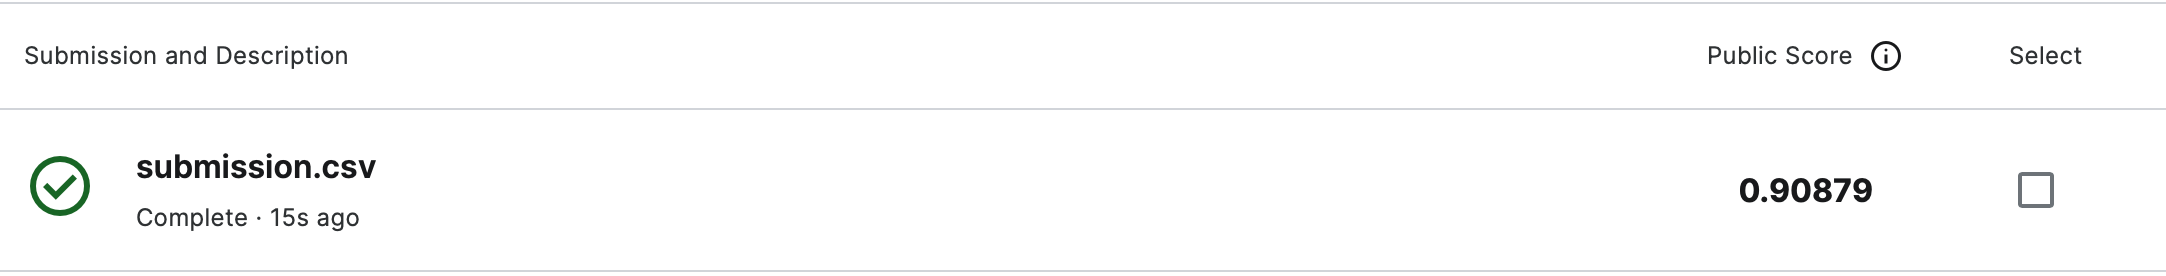

In [19]:
from PIL import Image
Image.open("./screenshot.png")